## Réalisé Par :

- **AGOURAM**  Mohamed
- **OUHMIZ**   Rida
- **LAGRAMEZ** Hamza

- ### 3éme année Data Science

In [ ]:
!sudo apt-get install python-setuptools

In [ ]:
!pip uninstall xgboost
!pip install xgboost==0.81

Found existing installation: xgboost 1.5.2
Uninstalling xgboost-1.5.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/xgboost-1.5.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xgboost.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/xgboost/*
Proceed (y/n)? y
  Successfully uninstalled xgboost-1.5.2
     |████████████████████████████████| 16.6 MB 7.3 MB/s 


In [241]:
!pip install optuna

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=7ca4c74f2395e81e5620d07830ec3e8b28cb3307e577dd4cd40cce174d742c24
  Stored in directory: c:\users\hamza lagramez\appdata\local\pip\cache\wheels\9f\18\84\8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [281]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# **Importation**

Importation des bibliothèques contenant les modèles et les fonctions :

In [273]:
import time
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from copy import deepcopy
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import optuna 
from optuna.trial import Trial 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading 

In [146]:
dframe = pd.read_csv("new_Base_CDM.csv", delimiter=';', header=1)

In [283]:
#from @masumrumi'amazing plot!
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

# Data Visualisation 

On visualise la densité des variables numériques du Data Set

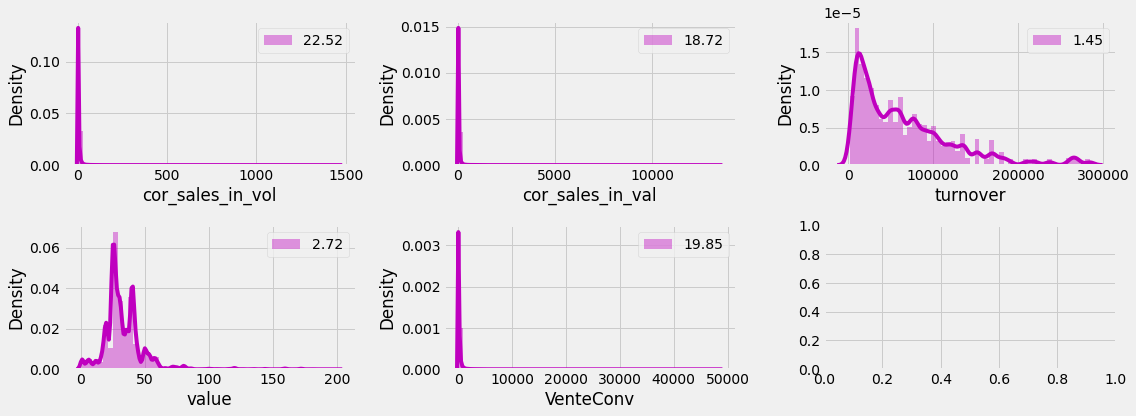

In [294]:
num_rows, num_cols = 2,3

f, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
#f.suptitle('Distribution of Features', fontsize=16)
for index, column in enumerate(dframe[numerics_val].columns):
    i,j = (index // num_cols, index % num_cols)
    g = sns.distplot(dframe[column], color="m", label="%.2f"%(dframe[column].skew()), ax=axes[i,j])
    g = g.legend(loc="best")


plt.tight_layout()
plt.show()

Informations générales du Data Set ( noms de colonnes, le nombre de valeurs manquantes...).

In [147]:
dframe.describe() # Statistiques descriptives des donnees quantitatives

,cor_sales_in_vol,cor_sales_in_val,turnover,value,VenteConv
count,200737.000000,200737.000000,200737.000000,200737.000000,200737.000000
mean,6.326886,52.024741,65348.859647,32.754241,227.862773
std,18.264038,166.254333,57249.908990,16.034234,828.147639
min,0.060000,0.200000,1693.000000,1.000000,1.000000
25%,1.000000,10.540000,20115.000000,25.000000,40.000000
50%,3.000000,21.450000,51500.000000,30.000000,80.000000
75%,6.000000,45.140000,91146.000000,40.000000,189.000000
max,1475.000000,13589.220000,284844.000000,200.000000,48816.000000


In [148]:
print("Les dimensions de notre jeu de donnees :" , dframe.shape)
print()
print(dframe.info())

Les dimensions de notre jeu de donnees : (200737, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200737 entries, 0 to 200736
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Display           200737 non-null  object 
 1   cor_sales_in_vol  200737 non-null  float64
 2   cor_sales_in_val  200737 non-null  float64
 3   turnover          200737 non-null  int64  
 4   value             200737 non-null  int64  
 5   ENSEIGNE          200737 non-null  object 
 6   VenteConv         200737 non-null  float64
 7   Feature           200737 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 12.3+ MB
None


In [149]:
dframe.Display.unique() # Les différentes modalités de la variable dependante.

array(['No_Displ', 'Displ'], dtype=object)

In [150]:
dframe.Display.value_counts()/200737*100 # La distribution des modalités de la variable dépendante Display.

No_Displ    93.632464
Displ        6.367536
Name: Display, dtype: float64

In [151]:
dframe.ENSEIGNE.unique() # Les modalites de la variable ENSEIGNE.

array(['MONOPRIX', 'PRISUNIC', 'SIMPLY MARKET', 'FRANPRIX',
       'CARREFOUR MARKET', 'AUCHAN', 'CARREFOUR', 'LECLERC',
       'INTERMARCHE', 'CASINO', 'SHOPI', 'CORA', 'GEANT', 'MATCH',
       'SUPER U', 'ECOMARCHE', 'OTHERS', 'MARCHE U', 'HYPER U'],
      dtype=object)

In [152]:
# Affiche les variables quantitatives du Dataset
numerics_val_ind = [i for i in range(len(list(dframe.dtypes))) if str(list(dframe.dtypes)[i]) in ['float64', 'int64']]
numerics_val = []
for elt in numerics_val_ind :
    numerics_val.append(dframe.columns[elt])

In [153]:
numerics_val

['cor_sales_in_vol', 'cor_sales_in_val', 'turnover', 'value', 'VenteConv']

In [154]:

cat_var = [e for e in dframe.columns if e not in numerics_val]
# Creation de l'echantillion du sondage
df_cat = dframe[cat_var]

data_crosstab = pd.crosstab(dframe['Display'],
                            dframe['ENSEIGNE'],
                           margins=True, margins_name="Total")
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = dframe['Display'].unique()
columns = dframe["ENSEIGNE"].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    

The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1588.1488447135125  and p value is: 0.0
Null Hypothesis is rejected.


In [155]:
data_crosstab = pd.crosstab(dframe['Display'],
                            dframe['Feature'],
                           margins=True, margins_name="Total")
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = dframe['Display'].unique()
columns = dframe["Feature"].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 40744.318290735806  and p value is: 0.0
Null Hypothesis is rejected.


In [156]:
data_crosstab = pd.crosstab(dframe['Feature'],
                            dframe['ENSEIGNE'],
                           margins=True, margins_name="Total")
# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = dframe['Feature'].unique()
columns = dframe["ENSEIGNE"].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 1915.3405052921305  and p value is: 0.0
Null Hypothesis is rejected.


Conclusion : Toutes les variables qualitatives sont independantes entre elles.

Premiere étape de prétraitement des variables catégorielles de notre jeu de données. On transforme leurs modalites en colonne contenant des 1 en cas d occurence de la modalite, 0 sinon.

In [157]:
BinLabel = LabelEncoder() # Transforme une variable catégorielle a deux modalités en variable binaire (0 et 1)
oneHot = OneHotEncoder() # Transforme chaque modalité d'une variable catégorielle en une colonne (1 signifie occurence de modalité, 0 sinon)
dframe.Display = BinLabel.fit_transform(dframe.Display) 
dframe.Feature = BinLabel.fit_transform(dframe.Feature)
tmpe = oneHot.fit(dframe.ENSEIGNE.to_numpy().reshape(-1, 1))
tmp = tmpe.transform(dframe.ENSEIGNE.to_numpy().reshape(-1, 1))
tmp = pd.DataFrame(tmp.toarray(), columns = sorted(list(dframe.ENSEIGNE.unique())))

In [158]:
dframe = pd.concat([dframe, tmp], axis = 1).drop(["ENSEIGNE"], axis = 1) # On supprime la colonne ENSEIGNE originale aprés traitement

In [159]:
X_train, X_test, y_train, y_test = train_test_split(dframe.iloc[:,1:], dframe.iloc[:,0], test_size=0.3) # On divise le jeu de données en données d'entraiement et de test

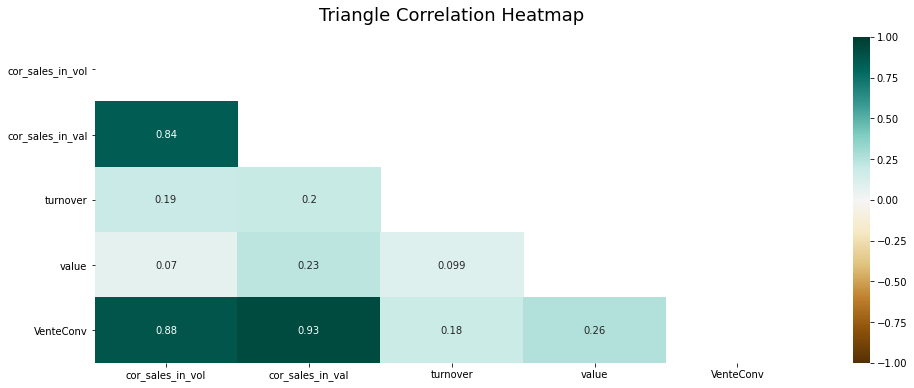

In [161]:
plt.figure(figsize=(16, 6))
# Matrice de correlation triangulaire des variables independantes quantitatives
mask = np.triu(np.ones_like(dframe[numerics_val].corr(), dtype=np.bool))
heatmap = sns.heatmap(dframe[numerics_val].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Puisqu'on a remarqué une forte correlation entre la variable VenteConv et les variables "cor_sales_in_vol" et "value"  : **VenteConv** = *cor_sales_in_vol* * *value*. Donc, on calcule le VIF pour être certain  qu'il y'a colinearité.

In [162]:
vif = pd.DataFrame()
for col in numerics_val :
     dframe[col] = dframe[col].astype(np.float64)
df_with_cte = add_constant(dframe[numerics_val])
vif["VIF"] = [variance_inflation_factor(df_with_cte.values, i) for i in range(df_with_cte.shape[1])]
vif["Features"] = df_with_cte.columns

vif[vif["VIF"] > 10]

,VIF,Features
5,10.447625,VenteConv


On cacule le facteur d'inflation de variance VIF, on remarque que la variable VenteConv a un VIF de 10 ce qui nous pousse a éliminer pour ameliorer le modele.

In [163]:
X_train.drop(["VenteConv"], inplace = True, axis = 1)
X_test.drop(["VenteConv"], inplace = True, axis = 1)

In [164]:
numerics_prim = deepcopy(numerics_val)
numerics_prim.remove('VenteConv')
X_train[numerics_prim].describe() # Données statistiques générales

,cor_sales_in_vol,cor_sales_in_val,turnover,value
count,140515.000000,140515.000000,140515.000000,140515.000000
mean,6.275063,51.325782,65300.403857,32.736171
std,17.819930,161.141343,57154.723781,15.952870
min,0.060000,0.200000,1693.000000,1.000000
25%,1.000000,10.520000,20115.000000,25.000000
50%,3.000000,21.450000,51500.000000,30.000000
75%,6.000000,45.080000,91146.000000,40.000000
max,1475.000000,13589.220000,284844.000000,198.000000


In [165]:
X_train.reset_index(inplace = True) # On réinitialise l'indice pour que le StandardScaler fonctionne
X_test.reset_index(inplace = True)  # On réinitialise l'indice pour que le StandardScaler fonctionne

In [166]:
std = StandardScaler().fit(X_train[numerics_prim])
X_train[numerics_prim] = pd.DataFrame(std.transform(X_train[numerics_prim]))
X_test[numerics_prim] = pd.DataFrame(std.transform(X_test[numerics_prim]))

In [167]:
X_train.info() #Information générales sur les données d'entrainement

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140515 entries, 0 to 140514
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             140515 non-null  int64  
 1   cor_sales_in_vol  140515 non-null  float64
 2   cor_sales_in_val  140515 non-null  float64
 3   turnover          140515 non-null  float64
 4   value             140515 non-null  float64
 5   Feature           140515 non-null  int32  
 6   AUCHAN            140515 non-null  float64
 7   CARREFOUR         140515 non-null  float64
 8   CARREFOUR MARKET  140515 non-null  float64
 9   CASINO            140515 non-null  float64
 10  CORA              140515 non-null  float64
 11  ECOMARCHE         140515 non-null  float64
 12  FRANPRIX          140515 non-null  float64
 13  GEANT             140515 non-null  float64
 14  HYPER U           140515 non-null  float64
 15  INTERMARCHE       140515 non-null  float64
 16  LECLERC           14

In [168]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60222 entries, 0 to 60221
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             60222 non-null  int64  
 1   cor_sales_in_vol  60222 non-null  float64
 2   cor_sales_in_val  60222 non-null  float64
 3   turnover          60222 non-null  float64
 4   value             60222 non-null  float64
 5   Feature           60222 non-null  int32  
 6   AUCHAN            60222 non-null  float64
 7   CARREFOUR         60222 non-null  float64
 8   CARREFOUR MARKET  60222 non-null  float64
 9   CASINO            60222 non-null  float64
 10  CORA              60222 non-null  float64
 11  ECOMARCHE         60222 non-null  float64
 12  FRANPRIX          60222 non-null  float64
 13  GEANT             60222 non-null  float64
 14  HYPER U           60222 non-null  float64
 15  INTERMARCHE       60222 non-null  float64
 16  LECLERC           60222 non-null  float6

In [169]:
X_train.head()

,index,cor_sales_in_vol,cor_sales_in_val,turnover,value,Feature,AUCHAN,CARREFOUR,CARREFOUR MARKET,CASINO,...,INTERMARCHE,LECLERC,MARCHE U,MATCH,MONOPRIX,OTHERS,PRISUNIC,SHOPI,SIMPLY MARKET,SUPER U
0,127174,-0.239904,-0.230890,-0.479847,-0.484941,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63507,-0.239904,-0.261546,-0.757742,-1.299844,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103472,-0.239904,-0.207680,2.533406,-0.798365,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88347,-0.296021,-0.256520,-0.111267,1.270236,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92788,-0.239904,-0.237964,-0.880077,-0.484941,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
X_train.drop(["index"], axis = 1, inplace = True) # On supprime la colonne d'indice
X_test.drop(["index"], axis = 1, inplace = True)

In [118]:
# Préparation d'un modele de regression logistique utilisant le solveur lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)
# Pus performant qu'un solveur linéaire
log_reg = LogisticRegressionCV(solver="lbfgs", n_jobs=-1, random_state=42, class_weight="balanced", cv = 10) 
log_reg.fit(X_train, y_train) #Entrainement du modele de regression logistique

LogisticRegressionCV(class_weight='balanced', cv=10, n_jobs=-1, random_state=42)

Aprés avoir entrainé le modele, on l'évalue  avec les données de test pour obtenir les mesures suivantes :Accuracy, f1_score , Recall, precision.

In [119]:
y_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_log_reg))

              precision    recall  f1-score   support

           0       0.30      0.61      0.40      3848
           1       0.97      0.90      0.94     56374

    accuracy                           0.88     60222
   macro avg       0.63      0.76      0.67     60222
weighted avg       0.93      0.88      0.90     60222



In [120]:
svm = SVC(C = 10 ,random_state=42, class_weight="balanced") #Modele de classification SVM : Support Vector Machine
svm.fit(X_train, y_train) # On entraine le modele sur les données d'entrainement

SVC(C=10, class_weight='balanced', random_state=42)

Aprés avoir entrainé le modele, on l'évalue  avec les données de test pour obtenir les mesures suivantes :Accuracy, f1_score , Recall, precision.

In [123]:
y_svm = svm.predict(X_test)
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.32      0.67      0.43      3848
           1       0.98      0.90      0.94     56374

    accuracy                           0.89     60222
   macro avg       0.65      0.79      0.68     60222
weighted avg       0.93      0.89      0.90     60222



In [181]:
 #Modele de classification "forets aléatoires" avec 300 arbres de décision et le bootstraping activé
 rand_forest = RandomForestClassifier(n_estimators=300, min_samples_split=7, bootstrap=True, oob_score=True, n_jobs=-1, class_weight="balanced_subsample")
 #Entrainement du modele
 rand_forest.fit(X_train, y_train)
 y_rand_forest = rand_forest.predict(X_test)

##### Aprés avoir entrainé le modele, on l'évalue  avec les données de test pour obtenir les mesures suivantes :Accuracy, f1_score , Recall, precision.

In [182]:
print(classification_report(y_test, y_rand_forest))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60      3867
           1       0.97      0.97      0.97     56355

    accuracy                           0.95     60222
   macro avg       0.78      0.80      0.79     60222
weighted avg       0.95      0.95      0.95     60222



On identifie les variables contribuant le plus dans la détection des relations entre la variable dépendante et les variables indépendantes.

In [184]:
start_time = time.time()
importances = rand_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.287 seconds


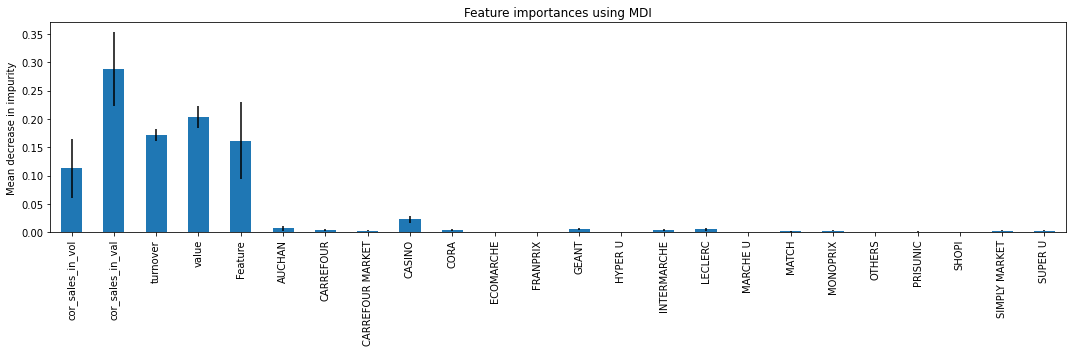

In [185]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots(figsize = (15,5))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

On remarque que les variables numériques sont les plus significatives.

In [188]:
 # On a choisit XGBoost comme methode d'ensemblement (ensembling method) avec un booster "gbtree" puisqu'il donne les meilleurs résultats
 xgboost = XGBClassifier(n_estimators=500, booster="gbtree", n_jobs=-1, subsample=0.7, random_state=42)
 xgboost.fit(X_train, y_train)
 y_xgboost = xgboost.predict(X_test)

[20:10:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Aprés avoir entrainé le modele, on l'évalue  avec les données de test pour obtenir les mesures suivantes :Accuracy, f1_score , Recall, precision.

In [ ]:
print(classification_report(y_test, y_xgboost))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48      2491
           1       0.96      0.99      0.97     37657

    accuracy                           0.95     40148
   macro avg       0.82      0.68      0.73     40148
weighted avg       0.94      0.95      0.94     40148



### Optimisation des hyperparametres par optuna

In [262]:
# Execute l'optimisation Bayesienne de la bibliotheque Optuna basé sur l'algorithme Tree-structured Parzen Estimator.
# L'optimisation Bayesienne permet de trouver les meilleurs hyper-parametres pour le modèle
# Plus performant que le GridSearch en terme de temps d'execution
start = time.time()
# Les differentes combinaisons que nous avons choisis pour optimiser le modele sont inclut dans la fonction ci-dessous
# Cette fonction permet de trouver les meilleurs hyper-parametre pour le modèle XGboost Classifier
def objective(trial,data=dframe[dframe.columns[1:]],target=dframe.Display):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'lambda': trial.suggest_loguniform(
            'lambda', 1e-3, 10.0
        ),
        'alpha': trial.suggest_loguniform(
            'alpha', 1e-3, 10.0
        ),
        'colsample_bytree': trial.suggest_categorical(
            'colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]
        ),
        'subsample': trial.suggest_categorical(
            'subsample', [0.6,0.7,0.8,1.0]
        ),
        'learning_rate': trial.suggest_categorical(
            'learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]
        ),
        'n_estimators': trial.suggest_categorical(
            "n_estimators", [150, 200, 300, 3000]
        ),
        'max_depth': trial.suggest_categorical(
            'max_depth', [4,5,7,9,11,13,15,17]
        ),
        'random_state': 42,
        'min_child_weight': trial.suggest_int(
                'min_child_weight', 1, 300
        ),
    }
    model = XGBClassifier(**param)  

    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)

    preds = model.predict(test_x)

    rmse = mean_squared_error(test_y, preds,squared=False)
    return rmse
    
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

print('It takes %s minutes' % ((time.time() - start)/60))

[I 2022-02-17 21:29:00,269] A new study created in memory with name: no-name-1fb2fba6-0d3c-4eba-ad9f-c910bb2d3b4c
C:\Users\hamza lagramez\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:29:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-02-17 21:41:24,247] Trial 0 finished with value: 0.23259370289558848 and parameters: {'lambda': 0.0046257147453525735, 'alpha': 0.03469420675057365, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'n_estimators': 3000, 'max_depth': 11, 'min_child_weight': 273}. Best is trial 0 with value: 0.23259370289558848.
C:\Users\hamza lagramez\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-02-17 21:41:43,871] Trial 1 finished with value: 0.23795761215007752 and parameters: {'lambda': 0.001068681271225537, 'alpha': 8.73858193220358, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.012, 'n_estimators': 150, 'max_depth': 11, 'min_child_weight': 157}. Best is trial 0 with value: 0.23259370289558848.
C:\Users\hamza lagramez\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-02-17 21:42:13,581] Trial 2 finished with value: 0.23585485269680798 and parameters: {'lambda': 1.1259510249919342, 'alpha': 0.9642004865256837, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.014, 'n_estimators': 150, 'max_depth': 13, 'min_child_weight': 174}. Best is trial 0 with value: 0.23259370289558848.
C:\Users\hamza lagramez\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-02-17 21:42:21,754] Trial 3 finished with value: 0.23564354473797838 and parameters: {'lambda': 0.2365999088104135, 'alpha': 5.921742931210382, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.01, 'n_estimators': 150, 'max_depth': 4, 'min_child_weight': 9}. Best is trial 0 with value: 0.23259370289558848.
C:\Users\hamza lagramez\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:42:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-02-17 21:43:31,337] Trial 4 finished with value: 0.23564354473797838 and parameters: {'lambda': 0.004452741775623389, 'alpha': 1.0572370353319733, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.008, 'n_estimators': 300, 'max_depth': 13, 'min_child_weight': 251}. Best is trial 0 with value: 0.23259370289558848.


Number of finished trials: 5
Best trial: {'lambda': 0.0046257147453525735, 'alpha': 0.03469420675057365, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'n_estimators': 3000, 'max_depth': 11, 'min_child_weight': 273}
It takes 14.518256219228109 minutes


In [264]:
best_params={
    'lambda': 0.0046257147453525735,
    'alpha': 0.03469420675057365,
    'colsample_bytree': 1.0,
    'subsample': 0.7,
    'learning_rate': 0.01,
    'n_estimators': 3000,
    'max_depth': 11,
    'min_child_weight': 273
}

In [268]:
y_train.drop('index',axis=1, inplace=True)

In [263]:
study.trials_dataframe().head()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_subsample,state
0,0,0.232594,2022-02-17 21:29:00.272366,2022-02-17 21:41:24.202616,0 days 00:12:23.930250,0.034694,1.0,0.004626,0.010,11,273,3000,0.7,COMPLETE
1,1,0.237958,2022-02-17 21:41:24.249617,2022-02-17 21:41:43.870843,0 days 00:00:19.621226,8.738582,0.5,0.001069,0.012,11,157,150,0.7,COMPLETE
2,2,0.235855,2022-02-17 21:41:43.873846,2022-02-17 21:42:13.580778,0 days 00:00:29.706932,0.964200,1.0,1.125951,0.014,13,174,150,1.0,COMPLETE
3,3,0.235644,2022-02-17 21:42:13.583777,2022-02-17 21:42:21.753057,0 days 00:00:08.169280,5.921743,0.6,0.236600,0.010,4,9,150,1.0,COMPLETE
4,4,0.235644,2022-02-17 21:42:21.756057,2022-02-17 21:43:31.336718,0 days 00:01:09.580661,1.057237,0.9,0.004453,0.008,13,251,300,0.6,COMPLETE


In [271]:
xgb_best = XGBClassifier(**best_params, booster="gbtree", n_jobs=-1, random_state=42,)
xgb_best.fit(X_train, y_train)

C:\Users\hamza lagramez\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\hamza lagramez\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:10:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0.03469420675057365, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=0.0046257147453525735,
              learning_rate=0.01, max_delta_step=0, max_depth=11,
              min_child_weight=273, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0.034694206, reg_lambda=0.00462571485,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [272]:
y_xgb_best = xgb_best.predict(X_test)
print(classification_report(y_test, y_xgb_best))

              precision    recall  f1-score   support

           0       0.66      0.35      0.46      3867
           1       0.96      0.99      0.97     56355

    accuracy                           0.95     60222
   macro avg       0.81      0.67      0.71     60222
weighted avg       0.94      0.95      0.94     60222



Aprés avoir entrainé le modele, on l'évalue  avec les données de test pour obtenir les mesures suivantes : Accuracy, f1_score , Recall, precision.

### Neural Networks

In [225]:
...
# Déclaration du modele Keras et de son architecture
model = Sequential()
model.add(Dense(256, input_dim=24, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [226]:
 #Compilation du modele avec binary_crossentropy comme fonction de cout et adagrad comme optimisateur.
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [227]:
...
# Entrainement du modele
callback = EarlyStopping(monitor = "loss", patience = 5)
model.fit(X_train, y_train, epochs=150, batch_size=200, callback = callback)

Epoch 1/150
703/703 [==============================] - 4s 4ms/step - loss: 0.4332 - accuracy: 0.9366
Epoch 2/150
703/703 [==============================] - 4s 5ms/step - loss: 0.2072 - accuracy: 0.9371
Epoch 3/150
703/703 [==============================] - 4s 6ms/step - loss: 0.1872 - accuracy: 0.9393
Epoch 4/150
703/703 [==============================] - 4s 6ms/step - loss: 0.1838 - accuracy: 0.9402
Epoch 5/150
703/703 [==============================] - 5s 7ms/step - loss: 0.1802 - accuracy: 0.9411
Epoch 6/150
703/703 [==============================] - 5s 7ms/step - loss: 0.1808 - accuracy: 0.9411
Epoch 7/150
703/703 [==============================] - 5s 7ms/step - loss: 0.1786 - accuracy: 0.9415
Epoch 8/150
703/703 [==============================] - 5s 7ms/step - loss: 0.1788 - accuracy: 0.9415
Epoch 9/150
703/703 [==============================] - 5s 7ms/step - loss: 0.1782 - accuracy: 0.9413
Epoch 10/150
703/703 [==============================] - 4s 6ms/step - loss: 0.1768 - accura

Aprés avoir entrainé le modele, on l'évalue  avec les données de test pour obtenir les mesures suivantes : Accuracy, f1_score , Recall, precision.

In [228]:
y_ann = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_ann))

              precision    recall  f1-score   support

           0       0.65      0.36      0.47      3867
           1       0.96      0.99      0.97     56355

    accuracy                           0.95     60222
   macro avg       0.80      0.67      0.72     60222
weighted avg       0.94      0.95      0.94     60222



On re-echantillone a partir du fichier de données originale pour obtenir une variable cible équilibré (50% pour chaque modalité) 

### on balance les donnees

In [229]:
# On sur-echantillone la modalité minoritaire dans le dataset
y_train = y_train.to_frame()
y_train.reset_index(inplace = True)
y_train.drop(["index"], axis = 1)
#
X_surEch, y_surEch = resample(X_train[y_train['Display'] == 0],
                                        y_train[y_train['Display'] == 0],
                                        replace=True,
                                        n_samples=X_train[y_train['Display'] == 1].shape[0],
                                        random_state=123)
#
# On concatene le nouvel echantillon et les données d'entrainement
#
X_balancé = pd.concat((X_train[y_train['Display'] == 1], X_surEch))
y_balancé = pd.concat((y_train[y_train['Display'] == 1], y_surEch))

In [233]:
print(y_balancé["Display"].value_counts()/y_balancé.shape[0] * 100) # Résultat après ré-echantillonage, meme distribution pour chaque modalité

0    50.0
1    50.0
Name: Display, dtype: float64


In [234]:
y_balancé = y_balancé["Display"]

On a effectué la classification RandomForest sur les données d'entrainement ré-échantillonés.

In [236]:
 #Modele de classification "forets aléatoires" avec 300 arbres de décision et le bootstraping activé
 rand_forest = RandomForestClassifier(n_estimators=300, min_samples_split=7, bootstrap=True, oob_score=True, n_jobs=-1, class_weight="balanced_subsample")
 #Entrainement du modele
 rand_forest.fit(X_balancé, y_balancé)
 y_rand_forest = rand_forest.predict(X_test)

On a obtenue une performance similaire apres re-echantillonage.

In [238]:
print(classification_report(y_test, y_rand_forest))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      3867
           1       0.97      0.97      0.97     56355

    accuracy                           0.95     60222
   macro avg       0.78      0.77      0.78     60222
weighted avg       0.95      0.95      0.95     60222

